
Pandas


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_note_interactivity = "all"
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt


1. Series

可被看做是一种长度固定且有序的字典，索引值和数据值构成键值对

In [5]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [7]:
print(obj.index, obj.values)

RangeIndex(start=0, stop=4, step=1) [ 4  7 -5  3]


In [13]:
#用标签指定index
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'c', 'a'])
obj2.index

Index(['d', 'b', 'c', 'a'], dtype='object')

In [14]:
obj2

d    4
b    7
c   -5
a    3
dtype: int64

In [15]:
obj2['a'] + obj2['d']

7

In [16]:
obj2[['c', 'a', 'd']] #['c', 'a', 'd']为索引列表

c   -5
a    3
d    4
dtype: int64

In [17]:
#利用布尔值进行条件过滤
obj2[obj2 > 0]

d    4
b    7
a    3
dtype: int64

In [18]:
obj2 * 2

d     8
b    14
c   -10
a     6
dtype: int64

In [19]:
#同样可以unfunc
np.exp(obj2)

d      54.598150
b    1096.633158
c       0.006738
a      20.085537
dtype: float64

In [20]:
sdata = {'Ohio' : 35000, 'Texas' : 71000, 'Oregon' : 16000, 'Utah' : 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [21]:
'b' in obj2 and 'e' in obj2

False

需要注意的是pandas中缺省值为NaN（Not a number）

In [22]:
obj4 = pd.Series(sdata, index=['California','Ohio','Oregon','Texas'])
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [23]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [24]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [26]:
obj4.isnull() #即是内置方法也是实例方法

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [27]:
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [28]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [29]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Series对象有name属性

In [30]:
obj4.name = 'population'
obj4.index.name = 'state'

In [31]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [32]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Series的索引可以通过按位置赋值的形式进行改变

In [33]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

2. DataFrame

能用一辈子的数据结构，结构化数据处理中的战斗机

每一列可以是不同的值类型（数值、字符串、布尔值等）

主要是二维的，多维依靠分层索引来实现

In [34]:
#2.1 利用等长列表或字典来构建dataframe
data = {'state' : ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
       'year' : [2000, 2001, 2002, 2001, 2002, 2003],
       'pop' : [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002
5,3.2,Nevada,2003


In [35]:
frame.head()

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [36]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [38]:
#没有的列对应的值会自动NaN填充
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                     index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [40]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [41]:
frame2.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

In [42]:
#2.2 可以按照字典标记或属性来检索
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [44]:
frame2.year
#需要注意的是，如果存在无效列名，则不能用属性索引的方法

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [48]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [49]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [50]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [51]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [52]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [53]:
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [54]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

需要注意的是从DataFrame中选取的列是数据中的视图，而不是靠背。因此对于某一列的修改会直接作用于原始的DataFrame中。

In [55]:
pop = {'Nevada' : {2001 : 2.4, 2002 : 2.9},
      'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [56]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [59]:
print(frame3.T.columns)
print(frame3.T.index)

Int64Index([2000, 2001, 2002], dtype='int64')
Index(['Nevada', 'Ohio'], dtype='object')


In [60]:
pop

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [61]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [62]:
pd.DataFrame(pop, index=[2000, 2001, 2002, 2003])

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [64]:
print(frame3)
pdata = {'Ohio': frame3['Ohio'][:-1],
        'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

      Nevada  Ohio
2000     NaN   1.5
2001     2.4   1.7
2002     2.9   3.6


,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7


In [65]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


DataFrame和Series对象的values属性都会返回数据本身的数组形式，比如：DataFrame中数据以二维ndarray返回

In [66]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [67]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

In [70]:
frame2.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

In [71]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [74]:
#DF“吃”的第一种数据结构 2D ndarray
arr = np.array(range(12)).reshape(4, 3)
df_ndarray = pd.DataFrame(arr,columns=['a','b','c'],index=['A','B','C','D'])
df_ndarray

,a,b,c
A,0,1,2
B,3,4,5
C,6,7,8
D,9,10,11


In [75]:
#第二种数据结构---数组、列表或元组构成的字典
dic1 = {'zyl': ['a','b','c'],
       'lsl': ['123','34','sdf'],
       'yiy': [8, 9, 10]}
df_listdic = pd.DataFrame(dic1)
df_listdic

,lsl,yiy,zyl
0,123,8,a
1,34,9,b
2,sdf,10,c


In [82]:
#第三种数据结构———Series构成的字典
dic2 = {'zyl': pd.Series([1,2,3,4]),
       'lsl': pd.Series(['asdf','ss','dd','ff'])}
df_dicseries = pd.DataFrame(dic2)
df_dicseries

,lsl,zyl
0,asdf,1
1,ss,2
2,dd,3
3,ff,4


In [85]:
#第四种数据结构———字典或Series构成的列表
diclist = [{'name': 'zyl', 'age': 18, 'edu': 'PHD'},
          {'name': 'lsl', 'age': 8, 'edu': 'PHD'},
          {'name': 'tl', 'age': 118, 'edu': 'PHD'}]
df_diclist = pd.DataFrame(diclist)
df_diclist

,age,edu,name
0,18,PHD,zyl
1,8,PHD,lsl
2,118,PHD,tl


In [86]:
#第五种———列表或元组构成的列表
lili = [['zyl', 23, 46, 78], 
        ['lsl', 99, 99, 100], 
        ['tl', 100, 100, 100]]
df_lili = pd.DataFrame(lili)
df_lili

,0,1,2,3
0,zyl,23,46,78
1,lsl,99,99,100
2,tl,100,100,100


In [90]:
#第六种———丢进去另一个DF
df_lili2 = pd.DataFrame(df_lili.values,index=['a','b','c'],
                        columns=['names','ENGLISH','CHINESE','ALGEBRA'])
df_lili2

,names,ENGLISH,CHINESE,ALGEBRA
a,zyl,23,46,78
b,lsl,99,99,100
c,tl,100,100,100


In [89]:
df_lili2 = pd.DataFrame(df_lili)
df_lili2

,0,1,2,3
0,zyl,23,46,78
1,lsl,99,99,100
2,tl,100,100,100


3. 索引对象

需要注意的是pandas存储轴标签的是一种叫索引对象的东东，元数据则用的是标签（xxx.index.name）。

数组和标签序列都可以转换成索引对象.

理解索引的机制非常重要，不容易造成使用上的混乱。

In [91]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [92]:
index[1:]

Index(['b', 'c'], dtype='object')

In [93]:
index[1] = 'd' #索引对象是不可变的

TypeError: Index does not support mutable operations

In [94]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [95]:
obj2 = pd.Series([1.5, -2.4, 0], index=labels)
obj2

0    1.5
1   -2.4
2    0.0
dtype: float64

索引对象类似于数组，也像一个固定大小不可变的集合（但是可重复的集合）

In [96]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [97]:
'Ohio' in frame3.columns

True

In [98]:
2003 in frame3.index

False

In [99]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

索引对象包括如下方法和属性：

append，difference，intersection，union，isin，delete，drop，insert，is_monotonic，is_unique，unique

4. 重建索引reindex

该方法用于创建一个符合新索引的新对象

In [100]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [102]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [103]:
#method可选参数允许我们使用ffill等模式进行插值
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [104]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [105]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                    index=['a', 'c', 'd'],
                    columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [107]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [108]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [109]:
#此种方法应当记住
frame.loc[['a', 'b', 'c', 'd'], states]

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


In [110]:
print(frame.index, frame.columns)

Index(['a', 'c', 'd'], dtype='object') Index(['Ohio', 'Texas', 'California'], dtype='object')


总结一下reindex方法的参数：

1. index和columns

2. method

3. fill_value

4. limit

5. tolerence

6. level

7. copy


In [112]:
help(frame.reindex)

Help on method reindex in module pandas.core.frame:

reindex(index=None, columns=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Conform DataFrame to new index with optional filling logic, placing
    NA/NaN in locations having no value in the previous index. A new object
    is produced unless the new index is equivalent to the current one and
    copy=False
    
    Parameters
    ----------
    index, columns : array-like, optional (can be specified in order, or as
        keywords)
        New labels / index to conform to. Preferably an Index object to
        avoid duplicating data
    method : {None, 'backfill'/'bfill', 'pad'/'ffill', 'nearest'}, optional
        method to use for filling holes in reindexed DataFrame.
        Please note: this is only  applicable to DataFrames/Series with a
        monotonically increasing/decreasing index.
    
        * default: don't fill gaps
        * pad / ffill: propagate last valid observation forward to next
          

5. 沿轴向删除（drop）

In [113]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [114]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [115]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [116]:
obj #drop后会返回一个新的object

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [118]:
#DF的轴向删除
data = pd.DataFrame(np.arange(16).reshape(4, 4),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [119]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


attention！！

在调用标签序列会根据行标签删除值（axis = 0 or 'index'），默认删除的是行向量

可以使用axis=1或者axis='columns'来从列中删除值

另外，data.drop('c', axis='index', inplace=True)中inplace属性激活后将不返回新数据，而是就地修改。

In [125]:
#attention——在调用标签序列会根据行标签删除值（axis = 0），默认删除的是行向量
#可以使用axis=1或者axis='columns'来从列中删除值
print(data.drop(['Colorado', 'Ohio']))
print(data)

          one  two  three  four
Utah        8    9     10    11
New York   12   13     14    15
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [126]:
data.drop('two', axis='columns')

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [127]:
data.drop('Ohio', axis='index')

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


6. 选择、索引、过滤以及使用loc和iloc选择数据

In [128]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [129]:
obj['b']

1.0

In [130]:
obj[1]

1.0

In [131]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [132]:
obj[['a', 'b', 'd']]

a    0.0
b    1.0
d    3.0
dtype: float64

In [133]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [134]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

需要注意，普通的Python切片不包含尾部（左闭右开），而Series与之不同。

In [135]:
obj['b' : 'c']

b    1.0
c    2.0
dtype: float64

In [137]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [138]:
#DF
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index=['Ohio', 'Colorado', 'Utah', 'New York'],
                   columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [141]:
data.values

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [142]:
data.one

Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int32

In [143]:
data['one']

Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int32

In [144]:
data['Ohio']

KeyError: 'Ohio'

In [145]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [146]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [153]:
data[:2] #标准的行选择语法，注意不要跟标签选择混淆；
         #传递单个元素或一个列表到[]符号中可以选择列。

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [150]:
arr = np.arange(12.).reshape(4,3)

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [151]:
arr[:2]

array([[0, 1, 2],
       [3, 4, 5]])

In [152]:
arr[:, :2]

array([[ 0,  1],
       [ 3,  4],
       [ 6,  7],
       [ 9, 10]])

In [155]:
#利用布尔值的DF作索引
#非常像numpy的语法
print(data < 5)
data[data < 5] = 0
print(data)

            one    two  three   four
Ohio       True   True   True   True
Colorado   True  False  False  False
Utah      False  False  False  False
New York  False  False  False  False
          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


使用loc和iloc选择数据

旧版本用的是ix，基本已经弃用了

In [156]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [158]:
data.index.name = 'state';data.columns.name = 'col'
data

col,one,two,three,four
state,,,,
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [159]:
data.loc['Colorado',['two', 'three']]

col
two      5
three    6
Name: Colorado, dtype: int32

In [160]:
data.iloc[2, [3, 0, 1]]

col
four    11
one      8
two      9
Name: Utah, dtype: int32

In [161]:
data.iloc[2] #第二行

col
one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [162]:
data.iloc[[1, 2], [3, 0, 1]]

col,four,one,two
state,,,
Colorado,7,0,5
Utah,11,8,9


In [163]:
data.loc[:'Utah','two']

state
Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [164]:
data.iloc[:, :3][data.three > 5]

col,one,two,three
state,,,
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


算术和数据对齐

pandas的一个重要特性就是，当存在两个索引不相同的两个对象相加时，返回结果的索引将是索引对的并集。

类似于索引标签的自动外连接（outer join）

In [165]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f' ,'g'])

In [166]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [167]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [168]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [173]:
df1 = pd.DataFrame(np.arange(9.).reshape(3,3),
                  columns=list('bcd'),
                  index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape(4,3),
                  columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [174]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [175]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [176]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


使用自定义填充值的DF算术方法

In [177]:
df1 = pd.DataFrame(np.arange(12.).reshape(3, 4),
                  columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape(4, 5),
                  columns=list('abcde'))

In [178]:
df2.loc[1, 'b']=np.nan

In [179]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [180]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [181]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [182]:
#利用add方法中的fill_value参数可以自定义填充值
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [183]:
#重建索引时，可以用fill_value来指定不同的填充值
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


算术方法：

add,radd,sub,rsub,div,rdiv,floordiv,rfloordiv,mul,rmul,pow,rpow

In [185]:
#DF与Series之间的操作
#与NumPy中不同维度的数组间操作类似
arr = np.arange(12.).reshape(3, 4)
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [186]:
arr[0]

array([0., 1., 2., 3.])

In [187]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [188]:
#其实就是广播
frame = pd.DataFrame(np.arange(12.).reshape(4, 3),
                    columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]

In [189]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [190]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [191]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [192]:
#列广播(默认是行)
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [193]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [194]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


你传递的axis值是用于匹配轴的。上面的示例表示我们需要在DataFrame的行索引上对行匹配（axis='index' or 0），并进行广播。

7. 函数应用和映射（提高运算速率和批处理数据的必会套路）

还记得NumPy数组中的ufunc吗？

需要注意的是DF是以列为基准轴的，因为列处理在二维表中更为频繁

In [195]:
frame = pd.DataFrame(np.random.randn(4, 3),
                    columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.135263,-0.356541,1.079702
Ohio,1.618259,-0.067535,0.165294
Texas,0.956967,-0.977778,0.300435
Oregon,-1.417495,-0.318196,-0.638961


In [196]:
np.abs(frame)

,b,d,e
Utah,0.135263,0.356541,1.079702
Ohio,1.618259,0.067535,0.165294
Texas,0.956967,0.977778,0.300435
Oregon,1.417495,0.318196,0.638961


In [198]:
#apply方法
f = lambda x: x.max() - x.min()
frame.apply(func=f)

b    3.035754
d    0.910243
e    1.718663
dtype: float64

In [199]:
frame.apply(f, axis='columns')

Utah      1.436243
Ohio      1.685794
Texas     1.934745
Oregon    1.099299
dtype: float64

In [200]:
frame.apply(f, axis=1)

Utah      1.436243
Ohio      1.685794
Texas     1.934745
Oregon    1.099299
dtype: float64

In [201]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [202]:
frame.apply(f)

,b,d,e
min,-1.417495,-0.977778,-0.638961
max,1.618259,-0.067535,1.079702


In [203]:
#逐个元素计算可以使用applymap方法
#Series用map
forma = lambda x: '%.2f' % x
frame.applymap(forma)
#用这种方法来批量约束数据非常优雅

,b,d,e
Utah,-0.14,-0.36,1.08
Ohio,1.62,-0.07,0.17
Texas,0.96,-0.98,0.30
Oregon,-1.42,-0.32,-0.64


In [204]:
frame['e'].map(forma)

Utah       1.08
Ohio       0.17
Texas      0.30
Oregon    -0.64
Name: e, dtype: object

8. 排序和排名

sort_index,sort_values,rank

In [207]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int32

In [208]:
frame.sort_index(axis=1)

,b,d,e
Utah,-0.135263,-0.356541,1.079702
Ohio,1.618259,-0.067535,0.165294
Texas,0.956967,-0.977778,0.300435
Oregon,-1.417495,-0.318196,-0.638961


In [209]:
frame.sort_index(0)

,b,d,e
Ohio,1.618259,-0.067535,0.165294
Oregon,-1.417495,-0.318196,-0.638961
Texas,0.956967,-0.977778,0.300435
Utah,-0.135263,-0.356541,1.079702


In [210]:
frame = pd.DataFrame(np.arange(8).reshape(2,4),
                    index=['three', 'one'],
                    columns=['d', 'a', 'b', 'c'])

In [211]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [212]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [213]:
obj = pd.Series([4, 7, -3, 2])

In [215]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

当需要将DF中某一列或多个列用作排序键时，可以在sort_values中设定可选参数by

In [216]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [217]:
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [218]:
frame.sort_values(by=['a', 'b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


In [219]:
# rank
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                     'c': [-2, 5, 8, -2.5]})
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [220]:
frame.rank(axis='columns')

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


含有重复标签的轴索引

In [221]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int32

In [222]:
obj.index.is_unique

False

In [223]:
obj['a']

a    0
a    1
dtype: int32

In [224]:
obj['c']

4

In [225]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,-0.049202,-0.105866,-1.323118
a,0.189190,2.747993,0.248509
b,-0.962902,1.678487,-0.246258
b,-1.481088,-0.124591,-1.216607


In [226]:
df.loc['b']

,0,1,2
b,-0.962902,1.678487,-0.246258
b,-1.481088,-0.124591,-1.216607


In [227]:
df.loc['b'][:1]

,0,1,2
b,-0.962902,1.678487,-0.246258


8. 描述性统计的概述和计算

In [228]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                 index=['a', 'b', 'c', 'd'],
                 columns=['one', 'two'])

In [229]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [230]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [231]:
df.sum(axis=1) # 将一行上各个列的值相加

a    1.40
b    2.60
c     NaN
d   -0.55
dtype: float64

In [232]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

规约方法可选参数：

axis，skipna，level

In [233]:
df.idxmax()

one    b
two    d
dtype: object

In [234]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [236]:
#describe一次返回多个汇总统计
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [237]:
#对于非数值型的数据，describe产生另一种汇总统计
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

描述性统计和汇总统计方法：

count

describe

min,max

argmin,argmax

idxmin,idxmax

quantile

sum,mean,median

mad 平均值的平均绝对偏差

prod 所有值的乘积

var，std

skew，kurt

cumsum，cummin， cummax，cumprod（值的累计乘积）

diff计算第一个算术差值（对时间序列有用）

pct_change计算百分比


In [238]:
import pandas_datareader.data as web

In [239]:
all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

In [240]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})

In [241]:
volume = pd.DataFrame({ticker: data['Volume'] for ticker, data in all_data.items()})

In [242]:
returns = price.pct_change()

In [243]:
returns.tail()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2019-04-23,0.014423,0.012580,0.011160,0.013575
2019-04-24,-0.001542,-0.006761,-0.003489,-0.003428
2019-04-25,-0.009075,0.005931,-0.009432,0.033117
2019-04-26,-0.004774,0.006910,0.005843,0.005730
2019-04-29,0.001517,0.012105,-0.002797,-0.000924


In [244]:
returns['MSFT'].corr(returns['IBM'])

0.4854632170795644

In [245]:
returns['MSFT'].cov(returns.IBM)

8.650056453159306e-05

In [246]:
returns.MSFT.corr(returns.IBM)

0.4854632170795644

In [247]:
returns.corr()#相关性系数

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.457978,0.370884,0.451071
GOOG,0.457978,1.000000,0.406997,0.537331
IBM,0.370884,0.406997,1.000000,0.485463
MSFT,0.451071,0.537331,0.485463,1.000000


In [248]:
returns.cov()#协方差

,AAPL,GOOG,IBM,MSFT
AAPL,0.000268,0.000115,0.000075,0.000107
GOOG,0.000115,0.000236,0.000077,0.000119
IBM,0.000075,0.000077,0.000152,0.000087
MSFT,0.000107,0.000119,0.000087,0.000209


In [249]:
#使用DF的corrwith方法可以计算出DF中行或者列于另一个序列或者DF的相关性。
returns.corrwith(returns.IBM)

AAPL    0.370884
GOOG    0.406997
IBM     1.000000
MSFT    0.485463
dtype: float64

唯一值、计数以及成员属性

In [250]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [251]:
uniques = obj.unique()

In [252]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [254]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [255]:
pd.value_counts(obj.values, sort = False)

b    2
c    3
a    3
d    1
dtype: int64

In [256]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [257]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

一个非常有趣的案例，计算一个DF中各个列中的频数直方图

In [258]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                    'Qu2': [2, 3, 1, 2, 3], 
                    'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [263]:
#注意看这个，以后会比较常用
result = data.apply(pd.value_counts).fillna(0)

result

#行标签是所有列中出现的不同值，数值则是这些不同值在每个列中出现的次数。

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBC8321668>,
      dtype=object)

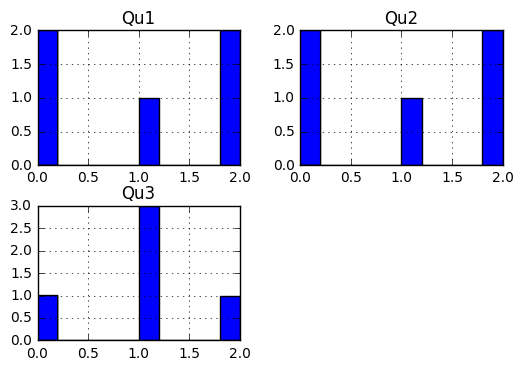

In [264]:
result.hist()